In [ ]:
# 2017 S2 FIT5211 Assignment 2
# Duo Pan
# 27554074

All points: 
((3, 60),(7, 19),(9, 61),(11, 48),(13, 0),(22, 71),(30, 1),(41, 75),(45, 46),(52, 3),(53, 25),(53, 94),(56, 93),(57, 69),(57, 83),(60, 12),(63, 6),(69, 67),(79, 22),(95, 87),)


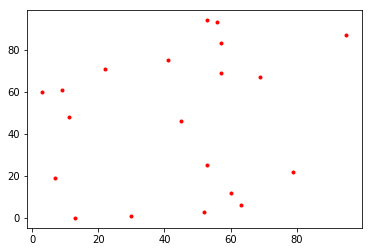

In [145]:
# Q1(1). ADT class for point and pointsSet
#        Remove unused method (such as remove a point from the set) to make it easier to read  

from math import *
import random
import matplotlib.pyplot as plt

class Point:
    # constructor
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # normal distance between self and other point
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)
    
    # make it can be printed as a string
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    # better format to show the object
    def __repr__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"

    # make the class can be compare, and it makes sort easily.
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x or (self.x == other.x and self.y > other.y)
    
    def __lt__(self, other):
        return self.x < other.x or (self.x == other.x and self.y < other.y)


class PointSet:
    # constructor
    def __init__(self, init=None):
        if init is None:
            self.contents = []
        else:
            self.contents = init  
    
    # get length
    def __len__(self):
        return len(self.contents)
        
    # print all points in this set
    # the reason I do not use __str__ is that the String is too long
    def display(self):
        print('(', end = '')
        for item in self.contents:
            print(item, end = ',')
        print(')')
    
    # binary search, get the right index, called by insert()
    # return index and 0/1, 0 means not find, 1 means find
    def findPosition(self, elem):
        low = 0  
        high = len(self) - 1  
        while low <= high:  
            mid = (high + low) // 2  
            if self.contents[mid] == elem:  
                return mid, 1  
            elif self.contents[mid] > elem:  
                high = mid - 1  
            else:  
                low = mid + 1  
        return low, 0
    
    # insert Point by x ascending order first, then y ascending
    # called by create random points
    def insert(self, elem):
        index, isfind = self.findPosition(elem)  
        if isfind == 1:
            # do not accept 2 points with the same x,y
            return False
        else:
            self.contents.insert(index, elem) 
            return True

    # get x list, used for plot
    def getXS(self):
        xs = []
        for item in self.contents:
            xs.append(item.x)
        return xs
     
    # get y list, used for plot
    def getYS(self):
        ys = []
        for item in self.contents:
            ys.append(item.y)
        return ys      

    
# Q1(2). Create a function to generate a test set of n random points
#        n is a user-definable parameter.

# the points are stored in a PointSet object
def createRandomPoints(number):
    ps = PointSet()
    for i in range(0,number):
        point = Point(random.randint(0,R),random.randint(0,R))
        if ps.insert(point) == False:
            i -= 1
    return ps

# range of the map
R = 100  
# number of points
n = 20

pointSet = createRandomPoints(n)

#show all the points
print("All points: ")
pointSet.display()

# plot all points in a image
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
plt.show()

In [146]:
# Q2. Implement an ADT class for Partition

# without path compression
class Partition:
    # generate a new partition 
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
        print("without path compression")

    # generate a new set within the partition
    def make_set(self,x):
        self.parent[x] = x
        self.rank[x] = 0
        
    # find a set to which an element belongs (find)
    # without path compression
    def find(self,x):
        while(self.parent[x] != x):
            x = self.parent[x]
        return x
    
    # merging two sets (union)
    def union(self,x, y):
        A = self.find(x)
        B = self.find(y)
        if self.rank[A] < self.rank[B]:
            self.parent[B] = A
        else:
            self.parent[A] = B
            if self.rank[A] == self.rank[B]:
                self.rank[B] = self.rank[B] + 1
       
    

without path compression

Raw data, Use index represents vertices:
{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'edges': {(14.0, 13, 14), (10.0499, 12, 14), (19.9249, 1, 4), (16.4012, 2, 5), (12.1655, 13, 17), (17.0294, 4, 6), (13.1529, 2, 3), (19.4165, 5, 7), (22.4722, 8, 10), (22.0907, 6, 9), (32.8024, 17, 19), (25.9422, 8, 13), (3.1623, 11, 12), (21.4709, 15, 18), (14.7648, 10, 15), (11.4018, 9, 16), (17.088, 7, 13), (6.7082, 15, 16), (6.0828, 0, 2)}}

Better display format: 
All tree vertices: (3, 60) (7, 19) (9, 61) (11, 48) (13, 0) (22, 71) (30, 1) (41, 75) (45, 46) (52, 3) (53, 25) (53, 94) (56, 93) (57, 69) (57, 83) (60, 12) (63, 6) (69, 67) (79, 22) (95, 87) 
All tree edges: (14.0,(57, 69),(57, 83)) (10.0499,(56, 93),(57, 83)) (19.9249,(7, 19),(13, 0)) (16.4012,(9, 61),(22, 71)) (12.1655,(57, 69),(69, 67)) (17.0294,(13, 0),(30, 1)) (13.1529,(9, 61),(11, 48)) (19.4165,(22, 71),(41, 75)) (22.4722,(45, 46),(53, 25)) (22.0907,(30, 1),(52, 3)

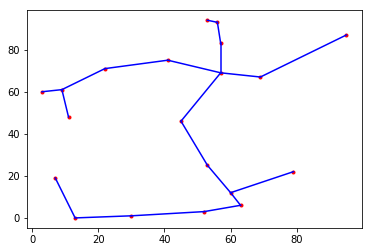

In [147]:
# Q3. Implement the clustering procedure

import matplotlib.pyplot as plt

def kruskal(graph):
    partition = Partition()
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition.find(u) != partition.find(v):
            partition.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
    
    return F, total

# point index represents the vertice in a tree
# Not use point itself Because Point type is 'unhashable type'
graph = {
'vertices': [i for i in range (0,len(pointSet.contents))],
'edges': set([])
}

# add edges in graph by connecting all points
for i in range (0,len(pointSet.contents)):
    for j in range (i+1,len(pointSet.contents)):
        e = round(pointSet.contents[i].distance(pointSet.contents[j]),4)
        graph['edges'].add((e,i,j))

# This is result
tree, total = kruskal(graph)

def showResults(g,t):
    # method 1:
    # Use index represents vertices
    print("Raw data, Use index represents vertices:")
    print(g)
    print()

    # method 2:
    # Display the results in readable format
    print("Better display format: ")
    print("All tree vertices: ", end = '')
    for i in g['vertices']:
        print(pointSet.contents[i], end = ' ')
    print()
    print("All tree edges: ", end = '')
    for i in g['edges']:
        print("(" + str(i[0]) + "," + str(pointSet.contents[i[1]]) + "," + str(pointSet.contents[i[2]]) + ")", end = ' ')

    print()

    # Display weights
    print()
    print('total weights: ', t)

    # show result in a image
    plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
    for e in g['edges']: 
        plt.plot([pointSet.contents[e[1]].x,pointSet.contents[e[2]].x],[pointSet.contents[e[1]].y,pointSet.contents[e[2]].y],'b')
    plt.show()
    
print()
showResults(tree,total)

with path compression

Raw data, Use index represents vertices:
{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'edges': {(14.0, 13, 14), (10.0499, 12, 14), (19.9249, 1, 4), (16.4012, 2, 5), (12.1655, 13, 17), (17.0294, 4, 6), (13.1529, 2, 3), (19.4165, 5, 7), (22.4722, 8, 10), (22.0907, 6, 9), (32.8024, 17, 19), (25.9422, 8, 13), (3.1623, 11, 12), (21.4709, 15, 18), (14.7648, 10, 15), (11.4018, 9, 16), (17.088, 7, 13), (6.7082, 15, 16), (6.0828, 0, 2)}}

Better display format: 
All tree vertices: (3, 60) (7, 19) (9, 61) (11, 48) (13, 0) (22, 71) (30, 1) (41, 75) (45, 46) (52, 3) (53, 25) (53, 94) (56, 93) (57, 69) (57, 83) (60, 12) (63, 6) (69, 67) (79, 22) (95, 87) 
All tree edges: (14.0,(57, 69),(57, 83)) (10.0499,(56, 93),(57, 83)) (19.9249,(7, 19),(13, 0)) (16.4012,(9, 61),(22, 71)) (12.1655,(57, 69),(69, 67)) (17.0294,(13, 0),(30, 1)) (13.1529,(9, 61),(11, 48)) (19.4165,(22, 71),(41, 75)) (22.4722,(45, 46),(53, 25)) (22.0907,(30, 1),(52, 3)) (

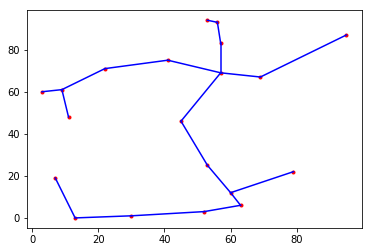

In [148]:
# Q4. Partition ADT class with path compression, and test with the same data

import matplotlib.pyplot as plt

del Partition

# with path compression
class Partition:
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
        print("with path compression")
        
    def make_set(self,x):
        self.parent[x] = x
        self.rank[x] = 0
        
    # with path compression
    def find(self,x):
        if x != self.parent[x]:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self,x, y):
        A = self.find(x)
        B = self.find(y)
        if self.rank[A] < self.rank[B]:
            self.parent[B] = A
        else:
            self.parent[A] = B
            if self.rank[A] == self.rank[B]:
                self.rank[B] = self.rank[B] + 1
                    

tree2, total2 = kruskal(graph)
print()
showResults(tree2,total2)

with path compression

Raw data, Use index represents vertices:
{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'edges': {(14.0, 13, 14), (10.0499, 12, 14), (19.9249, 1, 4), (16.4012, 2, 5), (12.1655, 13, 17), (17.0294, 4, 6), (13.1529, 2, 3), (19.4165, 5, 7), (3.1623, 11, 12), (21.4709, 15, 18), (14.7648, 10, 15), (11.4018, 9, 16), (17.088, 7, 13), (6.7082, 15, 16), (6.0828, 0, 2)}}

Better display format: 
All tree vertices: (3, 60) (7, 19) (9, 61) (11, 48) (13, 0) (22, 71) (30, 1) (41, 75) (45, 46) (52, 3) (53, 25) (53, 94) (56, 93) (57, 69) (57, 83) (60, 12) (63, 6) (69, 67) (79, 22) (95, 87) 
All tree edges: (14.0,(57, 69),(57, 83)) (10.0499,(56, 93),(57, 83)) (19.9249,(7, 19),(13, 0)) (16.4012,(9, 61),(22, 71)) (12.1655,(57, 69),(69, 67)) (17.0294,(13, 0),(30, 1)) (13.1529,(9, 61),(11, 48)) (19.4165,(22, 71),(41, 75)) (3.1623,(53, 94),(56, 93)) (21.4709,(60, 12),(79, 22)) (14.7648,(53, 25),(60, 12)) (11.4018,(52, 3),(63, 6)) (17.088,(41, 75),(

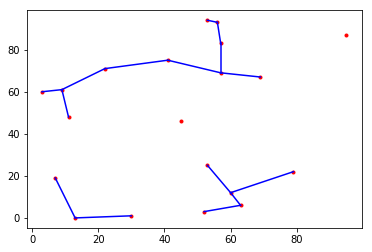

There are 5 Clusters: (raw data)
1 : {'vertices': [0, 2, 3, 5, 7, 11, 12, 13, 14, 17], 'edges': {(14.0, 13, 14), (10.0499, 12, 14), (16.4012, 2, 5), (12.1655, 13, 17), (3.1623, 11, 12), (13.1529, 2, 3), (17.088, 7, 13), (19.4165, 5, 7), (6.0828, 0, 2)}}
2 : {'vertices': [1, 4, 6], 'edges': {(17.0294, 4, 6), (19.9249, 1, 4)}}
3 : {'vertices': [8], 'edges': set()}
4 : {'vertices': [9, 10, 15, 16, 18], 'edges': {(14.7648, 10, 15), (11.4018, 9, 16), (21.4709, 15, 18), (6.7082, 15, 16)}}
5 : {'vertices': [19], 'edges': set()}

Better display:
1 : Vertices: (3, 60) (9, 61) (11, 48) (22, 71) (41, 75) (53, 94) (56, 93) (57, 69) (57, 83) (69, 67) , Edges: (14.0,(57, 69),(57, 83)) (10.0499,(56, 93),(57, 83)) (16.4012,(9, 61),(22, 71)) (12.1655,(57, 69),(69, 67)) (3.1623,(53, 94),(56, 93)) (13.1529,(9, 61),(11, 48)) (17.088,(41, 75),(57, 69)) (19.4165,(22, 71),(41, 75)) (6.0828,(3, 60),(9, 61)) 
2 : Vertices: (7, 19) (13, 0) (30, 1) , Edges: (17.0294,(13, 0),(30, 1)) (19.9249,(7, 19),(13, 0)) 
3 

In [149]:
# Q5. Implementation such that it stops when k clusters have been achieved and return those clusters.
#     k is a user-definable parameter.

import matplotlib.pyplot as plt
from collections import defaultdict

# stops when k clusters have been achieved and return those clusters
def k_kruskal(graph,k):
    partition = Partition()
    if k <= 0 or k >= len(graph['vertices']):
        print("Wrong cluster parameter, show 1-cluster result")
        k = 1
    k = len(graph['vertices']) - k
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition.find(u) != partition.find(v):
            partition.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
            k -= 1
            if k == 0:
                break   
                
    # trasfer forest to clusters
    vs = defaultdict(list)
    clusters = []
    # one key has a list of values, so one key in dict means a cluster
    for f in F['vertices']:
        vs[partition.find(f)].append(f)
    # fliter all clusters by retrieving from dict
    values = list(vs.values())
    # change clusters list to tree structures, only put in vertices, leave edges empty
    for i in range(0,len(vs)):
        clusters.append({'vertices': values[i],'edges': set([])})
    # add edges to the right clusters
    for e in F['edges']:
        for j in range(0,len(clusters)):
            if e[1] in clusters[j]['vertices']:
                clusters[j]['edges'].add(e)
                break
        
    return F, total, clusters

# k is the numebr of clusters
k = 5

tree3, total3, clusters = k_kruskal(graph,k)
print()
showResults(tree3,total3)

print("There are",k,"Clusters: (raw data)")
for i in range(0,len(clusters)):
    print(i+1,":",clusters[i])
    
print()
print("Better display:")
for i in range(0,len(clusters)):
    print(i+1,": Vertices: ", end = '')
    for j in clusters[i]['vertices']:
        print(pointSet.contents[j], end = ' ')
    print(", Edges: ", end = '')
    for j in clusters[i]['edges']:
        print("(" + str(j[0]) + "," + str(pointSet.contents[j[1]]) + "," + str(pointSet.contents[j[2]]) + ")", end = ' ')
    print()
    

In [152]:
# Q6. Implement methods to let the user query whether two given points belong to the same cluster.

# method 1

# parameter are the indexs in the pointSet, from 0 - (size-1)
# I have got all clusters in Q5
def isSameClusterByIndex(p,q,clusters):
    if p < 0 or p > len(pointSet) or q < 0 or q > len(pointSet):
        print("Wrong parameters")
        return
    for i in range(0,len(clusters)):
        if p in clusters[i]['vertices'] and q in clusters[i]['vertices']:
            return True
    return False

print("Method 1: by the index of points in a set")
print(isSameClusterByIndex(2,0,clusters))
print(isSameClusterByIndex(1,2,clusters))


# method 2

# parameter are the points of type Point, and clusters in Q5
def isSameClusterByPoint(p,q,clusters):
    # 1: this point exists in the pointSet 
    # 0: not exist
    _, isFindP = pointSet.findPosition(p)
    _, isFindQ = pointSet.findPosition(q)
    if isFindP == 0:
        print(p,"is not in the clusters")
        return
    if isFindQ == 0:
        print(q,"is not in the clusters")
        return
    for i in range(0,len(clusters)):
        temp = []
        for j in clusters[i]['vertices']:
            temp.append(pointSet.contents[j])
        if p in temp and q in temp:
            print(p,"and",q,"are in the same cluster")
            return 
    print(p,"and",q,"are not in the same cluster")
    return
  
print("Method 2: by the points (x, y)")
isSameClusterByPoint(Point(3, 60),Point(9, 61),clusters)
isSameClusterByPoint(Point(3, 61),Point(9, 61),clusters)
isSameClusterByPoint(Point(3, 60),Point(13, 0),clusters)

Method 1: by the index of points in a set
True
False
Method 2: by the points (x, y)
(3, 60) and (9, 61) are in the same cluster
(3, 61) is not in the clusters
(3, 60) and (13, 0) are not in the same cluster


In [151]:
# Q7. compute the Dunn index

# I have got all clusters in Q5, and it includes max_intra distance
# and a k=1 cluster in Q4, min_inter distance must in it.

def dunn_index(forest,cs):
    max_intra = -1
    min_inter = float("inf")
    for e in forest['edges']:
        # get max in one cluster
        if isSameClusterByIndex(e[1],e[2],cs):
            if e[0] > max_intra:
                max_intra = e[0]
        else:
            # get min between clusters
            if e[0] < min_inter:
                min_inter = e[0]
    return min_inter / max_intra

print("Dunn index is: ",dunn_index(tree2,clusters))

Dunn index is:  1.0288669780959343


In [117]:
# Q8. Compare the forest that you have generated for the k-clustering to the full minimum cost spanning tree
# Edges in MCST but not in the forestest of a k-clustering are those:

#     who are longer than others in forest. 
#     When creating MSCT, the edges are created in an ascending order by length,
#     so these longest edges will be created at last.
#     It meets the radical of clustering, which is putting nearer points in a cluster.

